Logistic Regression with L2 Regularization [Ridge Regression]

In [1]:
##Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Read heart disease classification Dataset
data = pd.read_csv('https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
##Check data shape
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
##Splitting train test split
import random

def train_test_split(data,test_size):
    if isinstance(test_size,float):
        test_size = round(test_size*len(data))
    indices = data.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    test_data = data.loc[test_indices]
    train_data = data.drop(test_indices)
    
    return train_data,test_data


In [6]:
train, test = train_test_split(data,0.3)

print("Train Dataset Shape",train.shape)
print("Test Dataset Shape",test.shape)


Train Dataset Shape (212, 14)
Test Dataset Shape (91, 14)


In [7]:
X_train = train.drop('target',axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']



In [8]:
print("Train Dataset Shape",X_train.shape)
print("Test Dataset Shape",X_test.shape)

Train Dataset Shape (212, 13)
Test Dataset Shape (91, 13)


In [9]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.547170,0.660377,0.943396,131.801887,247.051887,0.146226,0.514151,148.943396,0.339623,1.032547,1.382075,0.754717,2.358491
std,9.240476,0.474702,1.005484,17.832512,53.699375,0.354169,0.528602,22.621271,0.474702,1.188143,0.653289,1.037782,0.603131
min,34.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,0.500000,152.000000,0.000000,0.750000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [10]:
print("Train Dataset Features Shape",X_train.shape)
print("Train Dataset Labels Shape",y_train.shape)

print("Test Dataset Features Shape",X_test.shape)
print("Test Dataset Features Shape",y_test.shape)

X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

print("Train Dataset Features Shape",X_train.shape)
print("Train Dataset Labels Shape",y_train.shape)

print("Test Dataset Features Shape",X_test.shape)
print("Test Dataset Features Shape",y_test.shape)


Train Dataset Features Shape (212, 13)
Train Dataset Labels Shape (212,)
Test Dataset Features Shape (91, 13)
Test Dataset Features Shape (91,)
Train Dataset Features Shape (212, 14)
Train Dataset Labels Shape (212,)
Test Dataset Features Shape (91, 14)
Test Dataset Features Shape (91,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [12]:
# ## Sigmoid Function

def sigmoid(z): 
    return 1/(1 + np.exp(-z))

In [13]:
##Cost Fucntion

def cost_function(X, y, theta, lambda_):
    m = len(y)
    epsilon = 1e-5
    h = sigmoid(np.dot(X, theta))
    cost = (y * np.log(h+epsilon) + (1 - y) * np.log(1 - h + epsilon))+lambda_/(2)*sum(theta[1:] ** 2)
    return -cost.mean()


In [14]:
##Checking cost function value
# from numpy.random import rand
# B = rand(X_train.shape[1])
# alpha = 0.005
# iter_ = 20000
# j=cost_function(X_train,y_train,B,0.01)
# print(j)

In [15]:
def gradient_descent(X,y,B,alpha,iterations,_lambda):
    cost_history = np.zeros(shape=(iterations, 1))
    N = len(X)                 
    
    for iteration in range(iterations):        
        # Gradient Descent
        h = sigmoid(np.dot(X, B))
        grad = (1/N)*np.dot(X.T,(h - y))+(1/N)*(_lambda*B)
        B -= alpha*grad            
        cost = cost_function(X,y,B,_lambda)
        cost_history[iteration] = cost 
    return B,cost_history

In [16]:
def predict(X,B,threshold=0.5):
    z = np.dot(X,B)
    return [1 if i>threshold else 0 for i in sigmoid(z)]

In [17]:
from numpy.random import rand
B = rand(X_train.shape[1])
alpha = 0.005
iter_ = 20000
newB, cost_history = gradient_descent(X_train, y_train, B, alpha, iter_,0.01)

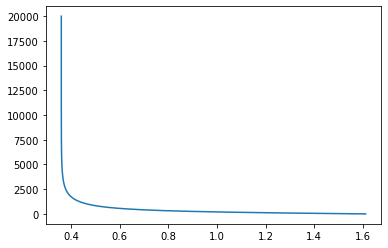

In [18]:
plt.plot(cost_history,range(iter_))
plt.show()

In [19]:
y_pred = predict(X_test, newB)
score = float(sum(y_pred == y_test))/ float(len(y_test))

print(score)

0.8461538461538461
